In [2]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import os
from astropy.time import Time
from astropy import units as u
import matplotlib

In [3]:
path='data/SR/'
files=os.listdir(path)
#files.remove('.ipynb_checkpoints')
len(files)

31

In [5]:
wf=[]
j=0
for i in files:
    #print(j)
    wf.append(Waterfall(path+i))
    j+=1
name=[]
j=0
for i in wf:
    name.append([i.container.f_start,files[j]])
    j+=1
name.sort(reverse=True)
wf=[]
for i in name:
    wf.append(Waterfall(path+i[1]))

In [5]:
wf=[]
j=0
for i in files:
    #print(j)
    wf.append(Waterfall(path+i))
    j+=1
time_order=[]
for i in wf:
    time_order.append([i.file_header.get('tstart'),i])
time_order.sort()
wf=[]
for i in time_order:
    wf.append(i[1])

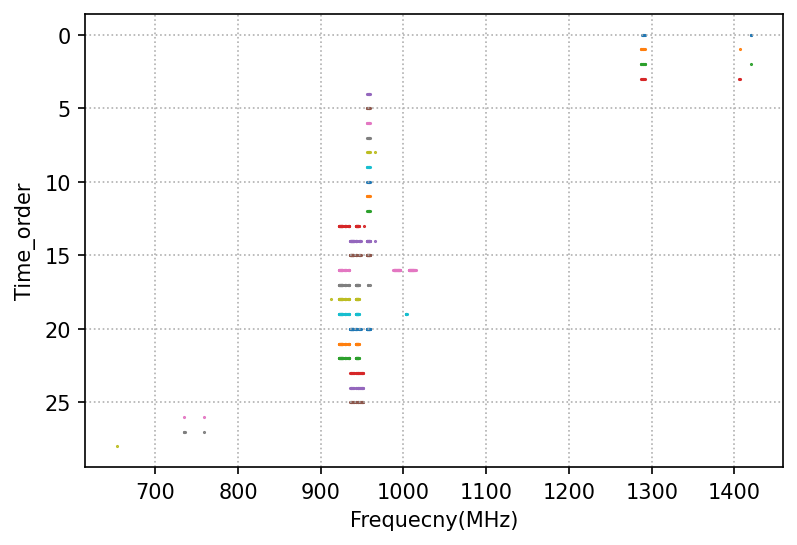

In [11]:
j=0
plt.figure(dpi=150)
for i in wf:
    maxi=np.amax(i.get_power()[1])
    multi=2.0
    if maxi>10000:
        multi=multi/10
    fi=rfi.intersection(i,multi=multi)
    y=np.zeros(fi.shape)
    y=np.where(y==0,j,y)
    plt.scatter(fi,y,s=0.25)
    j+=1
plt.gca().invert_yaxis()
plt.xlabel('Frequecny(MHz)')
plt.ylabel('Time_order')
#plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
plt.grid(linestyle=':')
#plt.grid(which='minor',color='gainsboro')
# plt.savefig('plots/after_mid/labelled_overall.pdf')

In [ ]:
j=1
plt.figure(figsize=(7,5),dpi=150)
for i in data['RFI(MHz)']:
    for k in i:
        plt.hlines(j,k[0],k[1],color='dodgerblue')
    j+=1
plt.plot([],[],color='dodgerblue',label='RFI')
# plt.vlines(880,0,50,'dodgerblue',linestyles='--')
# plt.vlines(960,0,50,'dodgerblue',linestyles='--')
# plt.vlines(1120,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1300,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1400,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1610,0,28,'dodgerblue',linestyles='--')
# plt.bar(700,50,width=312,color='w',hatch='/',label='UHF-band')
# plt.bar(972,50,width=232,color='w',hatch='X',label='UHF and L overlap')
# plt.bar(1400,50,width=624,color='w',hatch="\\",label='L-band')
# plt.text(900,50,str(a)+' obs')
# plt.text(1190,28,str(b)+' obs')
# plt.text(1490,28,str(c)+' obs')
plt.ylabel('Number of observation')
plt.xlabel('Frequency (MHz)')
plt.legend()
plt.savefig('plots/after_mid/RFI_vs_File_SR.pdf')

In [7]:
j=1
fig1=plt.figure(figsize=(10,4*4),dpi=100)
for i in wf[:4]:
    plt.subplot(4,1,j)
    f,p,base=rfi.base(i)
    maxi=np.max(p-base)
    multi=0.8
    if maxi>10000:
        multi=multi/10
    test=rfi.intersection(i,multi=multi)
    plt.plot(f,p,'k',label='Power')
    plt.plot(f,base,'r--',label='Baseline')
    plt.vlines(test,0,np.amax(p),'lime')
    thres=(p-base).std()*multi
    plt.plot(f,base+thres,label='Threshold')
    #plotting
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    plt.xlim(1284.0,1498.0)
    plt.text(1391,np.amax(p),'L-Band at '+time(i)+' from '+i.header['source_name'],size=5,ha='center',fontsize=10)
    #plt.yscale('log')
    plt.legend()
        #plt.ylim(np.amin(base),np.amax(p))
    #     if j!=49:
    #         plt.xticks([])
    #     plt.subplots_adjust(hspace=0)
        #print(j)
    j+=1
plt.savefig('plots/after_mid/all_fitting_SR_1.pdf',bbox_inches = 'tight')
plt.close()

In [5]:
j=1
fig2=plt.figure(figsize=(10,4*9),dpi=100)
for i in wf[4:13]:
    plt.subplot(9,1,j)
    f,p,base=rfi.base(i)
    maxi=np.max(p-base)
    multi=0.8
    if maxi>10000:
        multi=multi/10
    test=rfi.intersection(i,multi=multi)
    plt.plot(f,p,'k',label='Power')
    plt.plot(f,base,'r--',label='Baseline')
    plt.vlines(test,0,np.amax(p),'lime',lw=2.0)
    thres=(p-base).std()*multi
    plt.plot(f,base+thres,label='Threshold')
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    plt.xlim(952.0,980.0)
    plt.text(966.0,np.amax(p),'L-Band at '+time(i)+' from '+i.header['source_name'],size=5,ha='center',fontsize=10)
    #plt.yscale('log')
    plt.legend()
        #plt.ylim(np.amin(base),np.amax(p))
    #     if j!=49:
    #         plt.xticks([])
    #     plt.subplots_adjust(hspace=0)
        #print(j)
    j+=1
plt.savefig('plots/after_mid/all_fitting_SR_2.pdf',bbox_inches = 'tight')
plt.close()

In [9]:
j=1
fig3=plt.figure(figsize=(10,4*11),dpi=100)
for i in wf[13:23]:
    plt.subplot(11,1,j)
    f,p,base=rfi.base(i)
    maxi=np.max(p-base)
    multi=0.8
    if maxi>10000:
        multi=multi/10
    test=rfi.intersection(i,multi=multi)
    plt.plot(f,p,'k',label='Power')
    plt.plot(f,base,'r--',label='Baseline')
    plt.vlines(test,0,np.amax(p),'lime')
    thres=(p-base).std()*multi
    plt.plot(f,base+thres,label='Threshold')
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    plt.xlim(856.0,1070.0)
    plt.text(963.0,np.amax(p)*0.1,'L-Band at '+time(i)+' from '+i.header['source_name'],size=5,ha='center',fontsize=10)
    if j!=11:
        plt.ylim(-100,np.amax(p)*0.1)
    #plt.yscale('log')
    plt.legend()
    j+=1
plt.savefig('plots/after_mid/all_fitting_SR_3.pdf',bbox_inches = 'tight')
plt.close()

In [9]:
j=1
fig4=plt.figure(figsize=(10,4*8),dpi=100)
for i in wf[23:]:
    plt.subplot(len(wf[23:]),1,j)
    f,p,base=rfi.base(i)
    maxi=np.max(p-base)
    multi=1.5
    if maxi>10000:
        multi=multi/10
    test=rfi.intersection(i,multi=multi)
    plt.plot(f,p,'k',label='Power')
    plt.plot(f,base,'r--',label='Baseline')
    plt.vlines(test,0,np.amax(p),'lime')
    thres=(p-base).std()*multi
    plt.plot(f,base+thres,label='Threshold')
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(20))
    plt.grid()
    plt.grid(which='minor',color='whitesmoke')
    plt.xlim(544.0,952.0)
    plt.text(748,np.amax(p),'UHF-Band at '+MJD_time(i)+' from '+i.header['source_name'],size=5,ha='center',fontsize=10)
#     plt.ylim(ymax=)
    #plt.yscale('log')
    plt.legend()
    j+=1
plt.savefig('plots/after_mid/all_fitting_SR_4.pdf',bbox_inches = 'tight')
plt.close()

extracting integration 0...


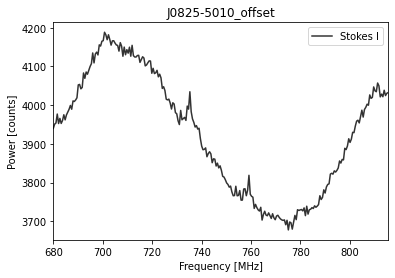

In [44]:
wf[-4].plot_spectrum()

In [8]:
data=pd.DataFrame()
data['source_name']=[]
data['time(MJD)']=[]
data['src_raj']=[]
data['f_range(MHz)']=[]
data['RFI(MHz)']=[]
for i in wf:
    f,p,b=rfi.base(i)
    maxi=np.amax(i.get_power()[1])
    multi=0.8
    if maxi>10000:
        multi=multi/10
    a=i.header['source_name']
    b=MJD_time(i)
    c=i.header['src_raj']
    d=(f[0],f[-1])
    e=rfi.rfi_range(i,multi=multi)
    data.loc[j]=[a,b,c,d,e]
    j+=1
#data=data.drop(labels='index')
data=data.reset_index()

In [10]:
data.to_csv('part_2.csv',index=False)

In [6]:
wf

[Waterfall data: data/SR/guppi_58997_59893_013516_Unknown_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_60582_013603_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_60656_013613_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_61195_013681_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_61268_013690_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_62203_013808_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_62854_013891_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_62929_013900_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_63458_013967_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil,
 Waterfall data: data/SR/guppi_58997_63657_013993_J0825-5010_offset_0001-i